<a href="https://colab.research.google.com/github/nikilstark/Google-Stock-Market-Prediction/blob/master/Google_stock_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install tensorflow-gpu

     |████████████████████████████████| 421.8MB 38kB/s 
     |████████████████████████████████| 3.9MB 55.8MB/s 
     |████████████████████████████████| 450kB 56.5MB/s 
ERROR: tensorflow 1.15.0 has requirement tensorboard<1.16.0,>=1.15.0, but you'll have tensorboard 2.1.1 which is incompatible.
ERROR: tensorflow 1.15.0 has requirement tensorflow-estimator==1.15.1, but you'll have tensorflow-estimator 2.1.0 which is incompatible.
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1


In [0]:
from google.colab import files
file = files.upload()

Saving GOOG (1).csv to GOOG (1).csv


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [0]:
data = pd.read_csv('/content/GOOG (1).csv')
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
3909,2020-03-02,1351.609985,1390.869995,1326.814941,1389.109985,1389.109985,2431500
3910,2020-03-03,1399.420044,1410.150024,1332.000000,1341.390015,1341.390015,2402300
3911,2020-03-04,1359.229980,1388.089966,1343.109985,1386.520020,1386.520020,1913300
3912,2020-03-05,1350.199951,1358.910034,1305.099976,1319.040039,1319.040039,2561300
3913,2020-03-06,1277.060059,1306.219971,1261.050049,1298.410034,1298.410034,2660000


In [0]:
data_train = data[data['Date']<'2019-01-01'].copy()
data_train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,49.813286,51.835709,47.800831,49.982655,49.982655,44871300
1,2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942800
2,2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342800
3,2004-08-24,55.412300,55.591629,51.591621,52.239193,52.239193,15319700
4,2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232100


In [0]:
data_test = data[data['Date']>='2019-01-01']
data_test

,Date,Open,High,Low,Close,Adj Close,Volume
3617,2019-01-02,1016.570007,1052.319946,1015.710022,1045.849976,1045.849976,1532600
3618,2019-01-03,1041.000000,1056.979980,1014.070007,1016.059998,1016.059998,1841100
3619,2019-01-04,1032.589966,1070.839966,1027.417969,1070.709961,1070.709961,2093900
3620,2019-01-07,1071.500000,1074.000000,1054.760010,1068.390015,1068.390015,1981900
3621,2019-01-08,1076.109985,1084.560059,1060.530029,1076.280029,1076.280029,1764900
...,...,...,...,...,...,...,...
3909,2020-03-02,1351.609985,1390.869995,1326.814941,1389.109985,1389.109985,2431500
3910,2020-03-03,1399.420044,1410.150024,1332.000000,1341.390015,1341.390015,2402300
3911,2020-03-04,1359.229980,1388.089966,1343.109985,1386.520020,1386.520020,1913300
3912,2020-03-05,1350.199951,1358.910034,1305.099976,1319.040039,1319.040039,2561300


In [0]:
training_data = data_train.drop(['Date','Adj Close'],axis=1)
training_data.head()

,Open,High,Low,Close,Volume
0,49.813286,51.835709,47.800831,49.982655,44871300
1,50.316402,54.336334,50.062355,53.952770,22942800
2,55.168217,56.528118,54.321388,54.495735,18342800
3,55.412300,55.591629,51.591621,52.239193,15319700
4,52.284027,53.798351,51.746044,52.802086,9232100


In [0]:
scaler = MinMaxScaler()
training_data= scaler.fit_transform(training_data)
training_data

array([[3.30294890e-04, 9.44785459e-04, 0.00000000e+00, 1.34908021e-04,
        5.43577404e-01],
       [7.42148227e-04, 2.98909923e-03, 1.88269054e-03, 3.39307537e-03,
        2.77885613e-01],
       [4.71386886e-03, 4.78092896e-03, 5.42828241e-03, 3.83867225e-03,
        2.22150736e-01],
       ...,
       [7.92197108e-01, 8.11970141e-01, 7.90196475e-01, 8.15799920e-01,
        2.54672037e-02],
       [8.18777193e-01, 8.21510648e-01, 8.20249255e-01, 8.10219301e-01,
        1.70463908e-02],
       [8.19874096e-01, 8.19172449e-01, 8.12332341e-01, 8.09012935e-01,
        1.79975186e-02]])

In [0]:
x_train = []
y_train = []

In [0]:
for i in range(60,training_data.shape[0]):
  x_train.append(training_data[i-60:i])
  y_train.append(training_data[i,0])

In [0]:
x_train,y_train = np.array(x_train),np.array(y_train)

In [0]:
x_train.shape,y_train.shape

((3557, 60, 5), (3557,))

In [0]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,LSTM,Dropout

In [0]:
regressor = Sequential()
regressor.add(LSTM(units=60,activation='relu',return_sequences=True,input_shape = (x_train.shape[1],5)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=60,activation='relu',return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=60,activation='relu',return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=120,activation='relu'))
regressor.add(Dropout(0.2))

regressor.add(Dense(1))

In [0]:
regressor.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 60, 60)            15840     
_________________________________________________________________
dropout_4 (Dropout)          (None, 60, 60)            0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 60, 60)            29040     
_________________________________________________________________
dropout_5 (Dropout)          (None, 60, 60)            0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 60, 60)            29040     
_________________________________________________________________
dropout_6 (Dropout)          (None, 60, 60)            0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 120)              

In [0]:
regressor.compile(optimizer='adam',loss='mean_squared_error')


In [0]:
regressor.fit(x_train,y_train,epochs=10,batch_size=2)

Train on 3557 samples
Epoch 1/10
3557/3557 [==============================] - 175s 49ms/sample - loss: 0.0056
Epoch 2/10
3557/3557 [==============================] - 175s 49ms/sample - loss: 0.0022
Epoch 3/10
3557/3557 [==============================] - 175s 49ms/sample - loss: 0.0018
Epoch 4/10
3557/3557 [==============================] - 176s 49ms/sample - loss: 0.0016
Epoch 5/10
3557/3557 [==============================] - 169s 48ms/sample - loss: 0.0014
Epoch 6/10
3557/3557 [==============================] - 167s 47ms/sample - loss: 0.0014
Epoch 7/10
3557/3557 [==============================] - 170s 48ms/sample - loss: 0.0012
Epoch 8/10
3557/3557 [==============================] - 166s 47ms/sample - loss: 0.0012
Epoch 9/10
3557/3557 [==============================] - 165s 46ms/sample - loss: 0.0011
Epoch 10/10
3557/3557 [==============================] - 165s 47ms/sample - loss: 0.0012


In [0]:
 data_test.head()

,Date,Open,High,Low,Close,Adj Close,Volume
3617,2019-01-02,1016.570007,1052.319946,1015.710022,1045.849976,1045.849976,1532600
3618,2019-01-03,1041.000000,1056.979980,1014.070007,1016.059998,1016.059998,1841100
3619,2019-01-04,1032.589966,1070.839966,1027.417969,1070.709961,1070.709961,2093900
3620,2019-01-07,1071.500000,1074.000000,1054.760010,1068.390015,1068.390015,1981900
3621,2019-01-08,1076.109985,1084.560059,1060.530029,1076.280029,1076.280029,1764900


In [0]:
past_60_days = data_train.tail(60)

In [0]:
df = past_60_days.append(data_test,ignore_index=True)

In [0]:
df = df.drop(['Date','Adj Close'],axis=1)

In [0]:
inputs = scaler.transform(df)
inputs

array([[0.93805611, 0.93755773, 0.92220906, 0.91781776, 0.0266752 ],
       [0.91527437, 0.91792904, 0.91350452, 0.90892169, 0.01425359],
       [0.90103881, 0.91343268, 0.89872289, 0.90204445, 0.02331778],
       ...,
       [1.07222551, 1.09336087, 1.07832872, 1.09699543, 0.02308636],
       [1.06483349, 1.06950566, 1.04668586, 1.04161641, 0.0309377 ],
       [1.0049608 , 1.02643042, 1.01001485, 1.02468592, 0.03213358]])

In [0]:
x_test=[]
y_test =[]
for i in range(60,inputs.shape[0]):
   x_test.append(inputs[i-60:i])
   y_test.append(inputs[i,0])

In [0]:
x_test,y_test = np.array(x_test),np.array(y_test)

In [0]:
y_pred = regressor.predict(x_test)

In [0]:
scaler.scale_

array([8.18605127e-04, 8.17521128e-04, 8.32487534e-04, 8.20673293e-04,
       1.21162775e-08])

In [0]:
scale = 1/8.18605127e-04

In [0]:
y_pred = y_pred*scale
y_test = y_test*scale

###**visualisation**

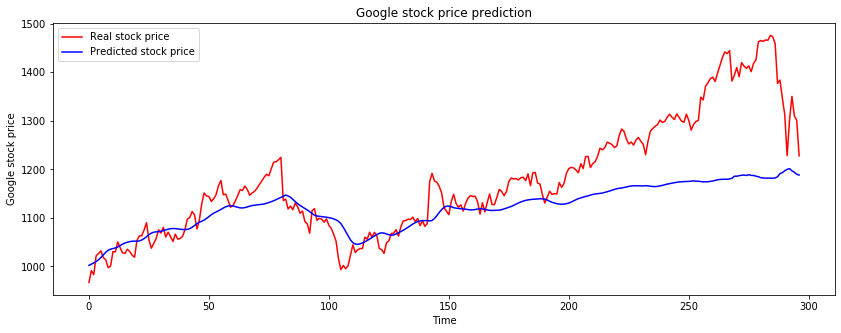

In [0]:
plt.figure(figsize=(14,5))
plt.plot(y_test,color = 'red',label ='Real stock price')
plt.plot(y_pred,color = 'blue',label = 'Predicted stock price')
plt.title('Google stock price prediction')
plt.xlabel('Time')
plt.ylabel('Google stock price')
plt.legend()
plt.show()